<a href="https://colab.research.google.com/github/bestjin98/python_data_basic/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 종목을 선정합니다. (예: 삼성전자)
2. 종목에 해당하는 주가를 불러옵니다. 
3. 종목에 해당하는 주가를 분석합니다.
  - 그래프 3개 이상 활용하기
  - 그래프에 대한 분석 의견 작성하기
  - 예시) 종가 변화량 선 그래프 그리기: 0월 0일 이후로 주가가 상승하는 추이를 보임
            캔들 차트 그리기: 0월 0일은 시가와 종가의 차이가 크게 나타남
4. 해당 종목을 모의 투자 시나리오를 정하고, 수익률을 계산합니다.
   - 예시) 최고점에 물렸다고 가정하고, 1% 하락시 추가 매수 했을 때의 수익률
   - 예시) 매달 초 1주씩 매수했다고 가정했을 때의 수익률
   - 예시) 0월 0일 이후, 종가 기준 3% 이상 하락한 경우 매수 했을 때의 수익률 
5. 특정 날짜에 해당 종목에 해당하는 신문기사를 크롤링하고, 신문기사의 주요 키워드를 분석합니다.
   - 예시) 0월 0일 삼성전자 신문기사의 워드 클라우드
   - 예시) 0월 0일 삼성전자 신문기사의 SNA

1. 카카오 종목을 선정
2. 카카오 종목의 주가를 불러옴

In [ ]:
pip install mplfinance

In [13]:
# import
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

In [6]:
kakao = yf.Ticker("035720.KS")
kakao_df = kakao.history(start="2023-01-01")
round(kakao_df, 2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-02 00:00:00+09:00,53600.0,53800.0,52400.0,52700.0,887667,0.0,0.0
2023-01-03 00:00:00+09:00,52400.0,53500.0,51400.0,53300.0,1420569,0.0,0.0
2023-01-04 00:00:00+09:00,53200.0,56000.0,53100.0,55700.0,2241411,0.0,0.0
2023-01-05 00:00:00+09:00,55800.0,58200.0,55700.0,57700.0,3046064,0.0,0.0
2023-01-06 00:00:00+09:00,57200.0,58000.0,56500.0,57200.0,1420345,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-14 00:00:00+09:00,60100.0,61000.0,59400.0,60500.0,2464952,0.0,0.0
2023-04-17 00:00:00+09:00,60200.0,60700.0,59600.0,60100.0,1450046,0.0,0.0
2023-04-18 00:00:00+09:00,60200.0,60800.0,58900.0,59000.0,1731564,0.0,0.0


3. 카카오 종목의 주가를 분석



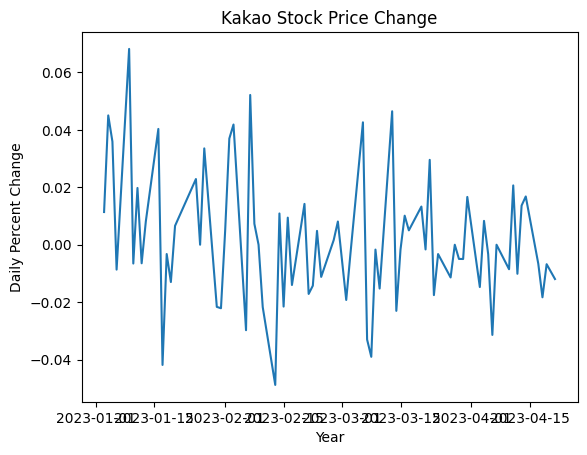

In [7]:
# 3-1 종가 변화량 선 그래프프
plt.plot(kakao_df['Close'].pct_change())
plt.title('Kakao Stock Price Change')
plt.xlabel('Year')
plt.ylabel('Daily Percent Change')
plt.show()

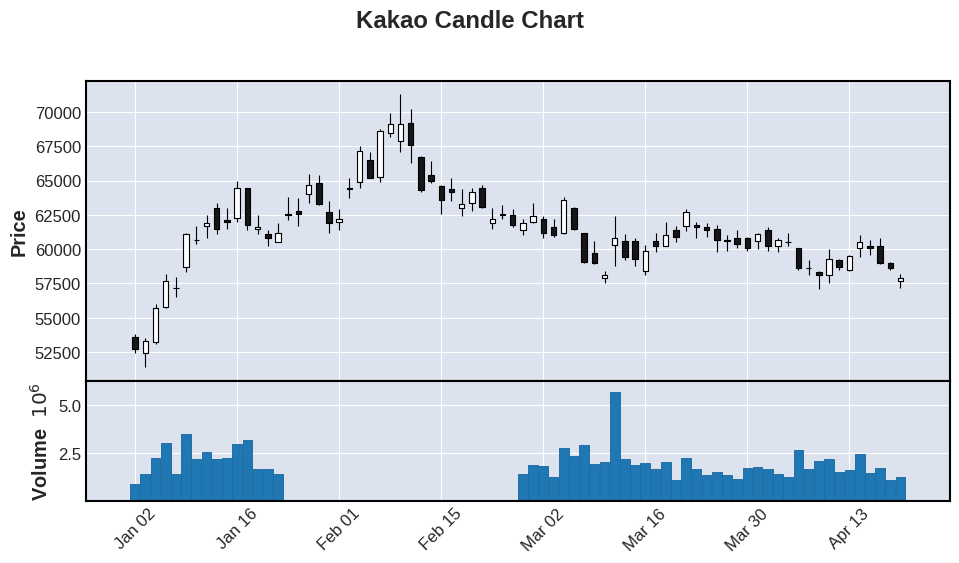

In [19]:
# 3-2 캔들 차트
mpf.plot(kakao_df, type='candle', volume=True, figsize=(12,6), title='Kakao Candle Chart')

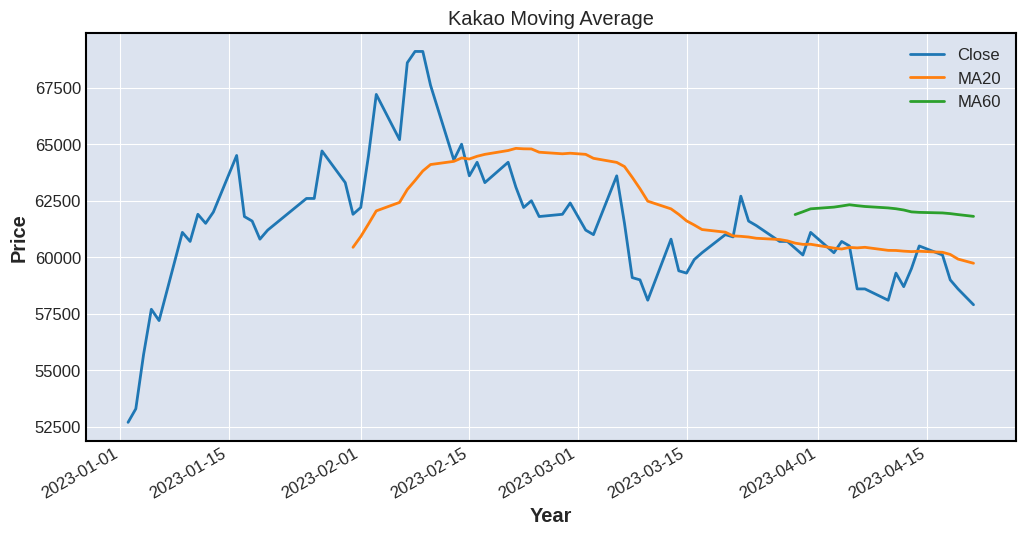

In [17]:
# 3-3 이동평균 차트
kakao_df['MA20'] = kakao_df['Close'].rolling(window=20).mean()
kakao_df['MA60'] = kakao_df['Close'].rolling(window=60).mean()
kakao_df[['Close', 'MA20', 'MA60']].plot(figsize=(12,6))
plt.title('Kakao Moving Average')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

4. 해당 종목을 모의 투자 시나리오를 정하고, 수익률을 계산

In [30]:
# 최고점에서 1% 하락 시 추가 매수한 경우의 수익률 계산
buy_price = kakao_df['Close'].max()  # 최고점에서 매수한 가격
add_buy_price = buy_price * 0.99  # 최고점에서 1% 하락 시 추가 매수한 가격
total_shares = 100  # 보유 주식 수
initial_investment = buy_price * total_shares  # 최초 투자금
add_buy_investment = add_buy_price * total_shares  # 추가 매수 투자금
final_value = kakao_df['Close'][-1] * total_shares  # 최종 평가금액
total_investment = initial_investment + add_buy_investment  # 총 투자금
total_return = final_value - total_investment  # 총 수익
roi = total_return / total_investment * 100  # 수익률 계산
print('>>>>> 4-1')
print(f"수익률: {roi:.2f}%",'\n')

# 매달 초 1주씩 매수한 경우의 수익률 계산
buy_price = kakao_df.resample('M').first()['Close'].values  # 각 달의 초에 매수한 가격
total_shares = 0  # 보유 주식 수
total_investment = 0  # 총 투자금
for i, price in enumerate(buy_price):
    if total_shares == 0:  # 최초 투자
        total_shares = 100
        total_investment = price * total_shares
    else:  # 추가 매수
        total_shares += 100
        total_investment += price * 100
    final_value = kakao_df['Close'][i+1] * total_shares  # 해당 달의 마지막 거래일 평가금액
total_return = final_value - total_investment  # 총 수익
roi = total_return / total_investment * 100  # 수익률 계산
print('>>>>> 4-2')
print(f"수익률: {roi:.2f}%",'\n')

# 종가 기준 3% 이상 하락 시 매수한 경우의 수익률 계산
buy_dates = kakao_df[kakao_df['Close'].pct_change() < -0.03].index  # 종가 기준 3% 이상 하락한 날짜
buy_price = kakao_df.loc[buy_dates]['Close'].values  # 해당 날짜에 매수한 가격
total_shares = 0  # 보유 주식 수
total_investment = 0  # 총 투자금
for i in range(len(kakao_df)-1):
  if kakao_df['Close'][i] >= 130000 and kakao_df['Close'][i+1] < 130000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 120000 and kakao_df['Close'][i+1] > 120000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 110000 and kakao_df['Close'][i+1] > 110000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 100000 and kakao_df['Close'][i+1] > 100000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 90000 and kakao_df['Close'][i+1] > 90000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 80000 and kakao_df['Close'][i+1] > 80000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 70000 and kakao_df['Close'][i+1] > 70000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 60000 and kakao_df['Close'][i+1] > 60000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 50000 and kakao_df['Close'][i+1] > 50000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 40000 and kakao_df['Close'][i+1] > 40000:
    buy_price = kakao_df['Close'][i+1]
  elif kakao_df['Close'][i] <= 30000 and kakao_df['Close'][i+1] > 30000:
    buy_price = kakao_df['Close'][i+1]

sell_price = kakao_df['Close'][-1]
profit = (sell_price - buy_price) / buy_price * 100

print('>>>>> 4-3')
print('매수 :', buy_price)
print('매도 :', sell_price)
print('Profit:', round(profit, 2), '%')

>>>>> 4-1
수익률: -57.89% 

>>>>> 4-2
수익률: -3.17% 

>>>>> 4-3
매수 : 60500.0
매도 : 57900.0
Profit: -4.3 %


5. 특정 날짜에 해당 종목에 해당하는 신문기사를 크롤링하고, 신문기사의 주요 키워드를 분석

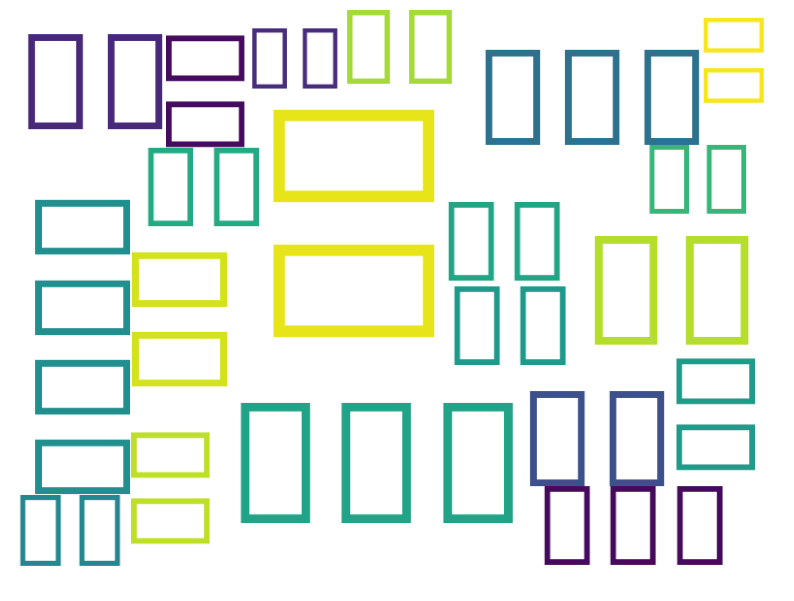

In [32]:
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

date = "20220401"
query = "삼성전자"

url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort=0&ds=" + date + "&de=" + date + "&nso=so%3Ar%2Cp%3Afrom" + date + "to" + date + "%2Ca%3A&start=1"
headers = {"User-Agent": "Mozilla/5.0"}
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

# 뉴스 제목과 본문을 추출
titles = soup.select(".news_tit")
texts = soup.select(".news_dsc")

okt = Okt()
keywords = []
for i in range(len(texts)):
    text = texts[i].text
    nouns = okt.nouns(text)
    nouns = [word for word in nouns if len(word) > 1]
    keywords.extend(nouns)

stopwords = ["삼성", "삼성전자", "기자", "뉴스"]
keywords = [word for word in keywords if word not in stopwords]

count = Counter(keywords)
most_common = count.most_common(20)  # 가장 빈번하게 등장하는 단어 20개를 추출

# 폰트경로 지정해줘야함함
# wc = WordCloud(font_path="NanumGothic.ttf", background_color="white", width=800, height=600)
wc = WordCloud(background_color="white", width=800, height=600)
cloud = wc.generate_from_frequencies(dict(most_common))

# 시각화
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.imshow(cloud)
plt.show()
